# Inhaltsverzeichnis 

- **MNIST Datensatz**
    - **Bibliotheken importieren**
        - **Erhaltene Information in Abhängigkeit der Principal Components**


# MNIST Datensatz

In diesem Notebook wollen wir eine Dimensionsreduzierung mittels **PCA** auf dem MNIST-Datensatz durchführen.

___
> <span style="color:blue"> **_INFO:_** </span> Der [MNIST](https://de.wikipedia.org/wiki/MNIST-Datenbank)-Datensatz ist ein weit verbreiteter Datensatz in der maschinellen Bildverarbeitung und im maschinellen Lernen. Er besteht aus einer Sammlung von handgeschriebenen Ziffern, die von einer großen Anzahl von Personen erstellt wurden.
___


Der Datensatz besteht aus Bildern mit $8 \times 8=64$ Pixeln. Das heißt die ursprünglichen Daten haben die Dimension 64, jedes Bild wird durch 64 Werte beschrieben. Wir wollen diese Dimension drastisch reduzieren (und damit effektiv die Bilder komprimieren). Bevor wir dies tun, wollen wir jedoch zuerst einen Überblick über die Daten gewinnen und uns dazu exemplarisch einige Bilder anzeigen lassen. 

## Bibliotheken importieren

Vorab importieren wir alle Bibliotheken, die wir in diesem Notebook benötigen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
sns.set()
%matplotlib inline

Die Funktion [`load_digits`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) lädt automatisch den Datensatz herunter.

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

**Wir haben 1797 Bilder mit je 64 Pixeln.**

## Daten darstellen

Wir bauen uns nun eine Hilfsfunktion `plot_data_point(data)` welches aus dem Datensatz $4\times 10=40$ Bilder darstellt. Dafür benutzen wir die [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) von `seaborn`. Diese Funktion ist in der Lage rechteckige Daten (z.b. Bilder) _farbig_ darzustellen. Wir teilen der Funktion mit das wir verschiedene Grauwerte in den Daten haben (`cmap="binary"`). 

In [3]:
def plot_data_point(data):
    # 4 rows, 10 spalten --> 40 bilder:
    fig,axes=plt.subplots(4,10,figsize=(10,4),
                          subplot_kw={"xticks":[],"yticks":[]},
                        gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i, ax in enumerate(axes.flat):
        try:
            image = data[i].reshape(8,8)
            sns.heatmap(image,cmap="binary",ax=ax,square=True,
                   xticklabels=False, yticklabels=False,cbar=False)
        except:
            pass
            #print("No data anymore")


Wir können nun einen Überblick über die Daten gewinnen, dazu lassen wir uns die ersten 40 Bilder des Datensatzes anzeigen:

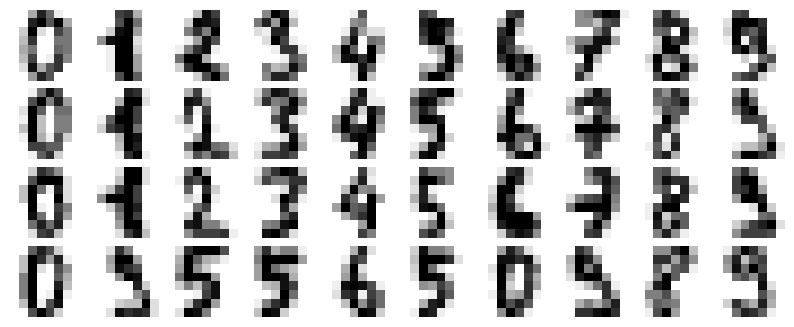

In [4]:
# Die ersten 40 Bilder
plot_data_point(digits.data)

## Reduzierung auf 2 Dimensionen

Nun wollen wir **PCA** anwenden:

In [5]:
pca = PCA(n_components=2,random_state=42) # From 64 dimensions to 2
pca.fit(digits.data)
projected = pca.transform(digits.data)


Zunächst wird ein **PCA**-"Objekt"  mit dem Argument 2 erstellt, was bedeutet, dass die Daten von ursprünglich $64$ Dimensionen auf $2$ Dimensionen reduziert werden sollen.

Dann wird die [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit)-Methode aufgerufen, um das PCA-Modell an die Daten (`digits.data`) anzupassen.

Anschließend wird die [`transform`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform)-Methode verwendet, um die Daten auf den reduzierten Raum abzubilden und die projezierten Daten in der Variablen `projected` zu speichern. Diese enthält nun die Datenpunkte in den neuen $2$ Dimensionen.

Wir betrachten explizit nochmals die Dimensionen der verschiedenen Daten:

In [6]:
print("Die Dimension der ursprünglichen Daten:",digits.data.shape)
print("Die Dimension der projizierten Daten:", projected.shape)


Die Dimension der ursprünglichen Daten: (1797, 64)
Die Dimension der projizierten Daten: (1797, 2)


In [7]:
projected_inverse = pca.inverse_transform(projected)
print(projected_inverse.shape)

(1797, 64)



## Darstellung der Daten in einem Scatterplot

Da die neuen Daten nun Dimension $2$ haben, können wir die Datenpunkte in einem Scatterplot wie gewohnt darstellen. Wir werden zusätzlich die Datenpunkte je Klasse (0...9 ) einfärben.

> **Wir erkennen, dass selbst in 2 Dimensionen, gleiche Zahlen dicht beieinander liegen.**

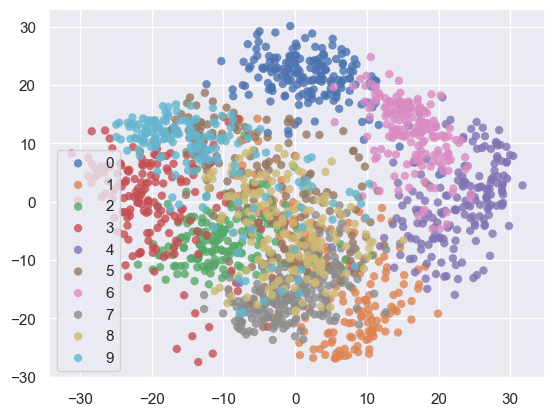

In [9]:
fig, ax = plt.subplots()
for i in range(10):
    mask= digits.target==i
    ax.scatter(projected[mask][:,0],projected[mask][:,1],
               label=i,
              alpha=0.8,
              edgecolor="none")
ax.legend()

# Reduzieren auf n Dimensionen

Wir wollen das gleiche nun probieren, aber wir reduzieren die Daten nun auf $20$ Dimensionen:

(17, 64)


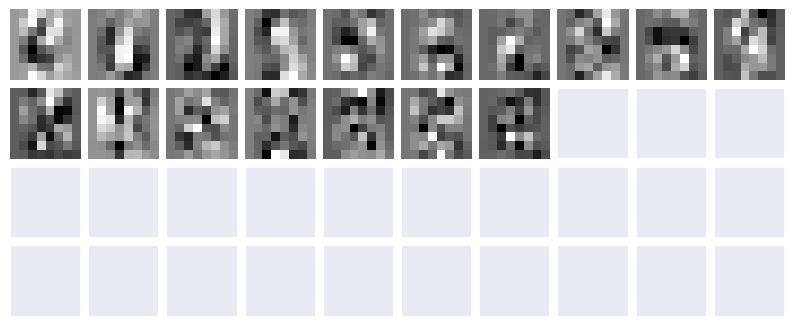

In [20]:
n=17
pca = PCA(n_components=n,random_state=42) # From 64 dimensions to n
pca.fit(digits.data)
projected = pca.transform(digits.data)
projected_inverse = pca.inverse_transform(projected)
print(pca.components_.shape)
plot_data_point(pca.components_)

    


Am Schluss wird die [`inverse_transform`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform)-Methode aufgerufen, um die inversen Transformationen der projizierten Daten durchzuführen und sie in den ursprünglichen Raum mit 64 Dimensionen zurückzuversetzen. Die Ergebnisse werden in der Variablen `projected_inverse` gespeichert.

Wir können uns nun die _ursprünglichen_ Daten und die "rücktransformierten" Daten visuell gegenüber stellen:

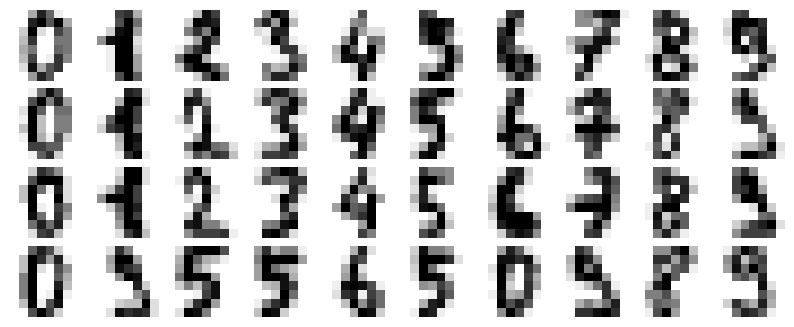

In [14]:
plot_data_point(digits.data) # Plottet die ursprünglichen Daten

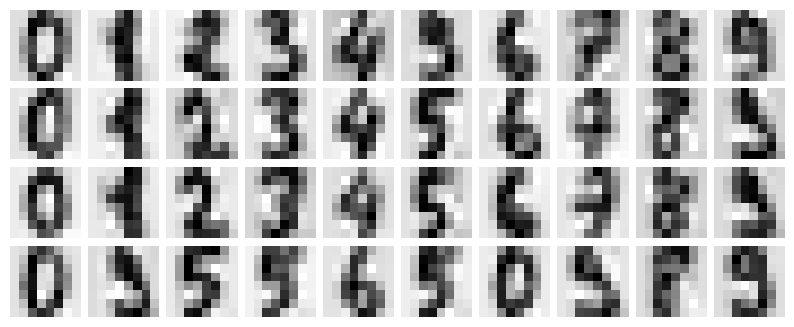

In [21]:
plot_data_point(projected_inverse) # Plottet die transformierten Daten

Wir sehen, dass die transformierten Daten etwas unschärfer sind (_komprimiert_), jedoch lässt sich noch immer gut die jeweilige Ziffer erkennen. **D.h. die Daten wurden komprimiert, dennoch - und das ist wichtig - wurden die wichtigen Informationen erhalten.**

Oder anders formuliert:

> **Durch die Reduzierung der Dimensionalität auf diejenigen _Principal Components_, die die größte Varianz erklären, können Daten effizienter dargestellt werden, wodurch redundante oder unwichtige Informationen eliminiert werden.**



> <span style="color:gray"> **_AUFGABE:_** </span> Ändere obiges `n` und betrachte die Ergebnisse. Bis zu welchem `n` lassen sich die Ziffern noch erkennen?

## Erhaltene Information in Abhängigkeit der Principal Components

Wir können uns die erhaltene Information (Varianz) auch anzeigen lassen, der folgende Code plottet die Anzahl der _Principal Components_ gegen die erhalten Information. Wir sehen, dass wir bei 20 Komponenten circa **90%** der Information erhalten!

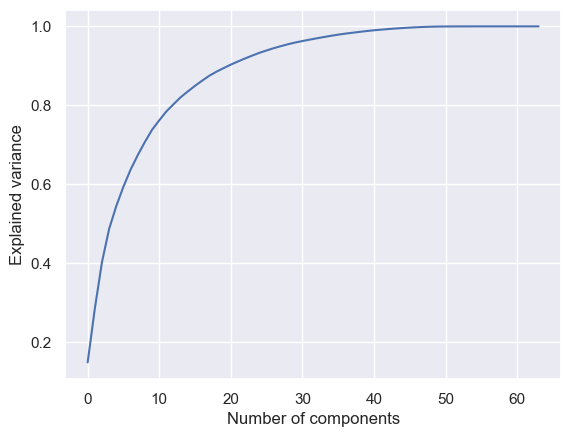

In [22]:
pca = PCA(n_components=64,random_state=42)
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()


# vorabdimensionierung von components(anzahl)


In [ ]:
# methode:
# --> "# np.cumsum(pca.explained_variance_ratio_)"

In [23]:

for i,value in enumerate(pca.explained_variance_ratio_):
    print(f"{i+1}. Principal Component erklärt {value*100:.2f}% der Varianz ")


1. Principal Component erklärt 14.89% der Varianz 
2. Principal Component erklärt 13.62% der Varianz 
3. Principal Component erklärt 11.79% der Varianz 
4. Principal Component erklärt 8.41% der Varianz 
5. Principal Component erklärt 5.78% der Varianz 
6. Principal Component erklärt 4.92% der Varianz 
7. Principal Component erklärt 4.32% der Varianz 
8. Principal Component erklärt 3.66% der Varianz 
9. Principal Component erklärt 3.35% der Varianz 
10. Principal Component erklärt 3.08% der Varianz 
11. Principal Component erklärt 2.37% der Varianz 
12. Principal Component erklärt 2.27% der Varianz 
13. Principal Component erklärt 1.82% der Varianz 
14. Principal Component erklärt 1.77% der Varianz 
15. Principal Component erklärt 1.47% der Varianz 
16. Principal Component erklärt 1.41% der Varianz 
17. Principal Component erklärt 1.32% der Varianz 
18. Principal Component erklärt 1.25% der Varianz 
19. Principal Component erklärt 1.02% der Varianz 
20. Principal Component erklärt 0.91%